In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

from tyssue import Sheet
from tyssue import PlanarGeometry
from tyssue.generation import generate_ring
from tyssue import config
from tyssue.draw import sheet_view




# Geometry classes

A `Geometry` class is a stateless class holding functions to compute geometrical aspects of an epithelium,
such as the edge lengths or the cells volume. As they are classes, inheritance can be used to define more and more specialized geometries.

For the user, a geometry class is expected to have an `update_all` method that takes an `Epithelium` instance as sole argument.

Calling this method will compute the relevant geometry on the epithelium.


## 2D Geometries 



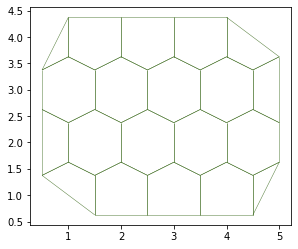

In [2]:
sheet_2d = Sheet.planar_sheet_2d('planar', nx=6, ny=6, 
                                 distx=1, disty=1)
sheet_2d.sanitize(trim_borders=True, order_edges=True)
fig, ax = sheet_view(sheet_2d)

### Displacing vertices

Most of the geometry is purely defined by the vertices positions. It is possible to change those by modifying directly the vertex dataframe


For exemple, we can center the vertices around 0 like so:

Sheet center of mass :
x    2.75
y    2.50
dtype: float64
New center of mass :
x    0.0
y    0.0
dtype: float64


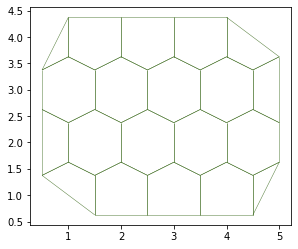

In [3]:
print("Sheet center of mass :")
print(sheet_2d.vert_df[sheet_2d.coords].mean(axis=0))

sheet_2d.vert_df[sheet_2d.coords] -= sheet_2d.vert_df[sheet_2d.coords].mean(axis=0)

print("New center of mass :")
print(sheet_2d.vert_df[sheet_2d.coords].mean(axis=0))

# The view does not change though
fig, ax = sheet_view(sheet_2d)

In order to propagate the change in vertices positions, we need to update the geometry:

In [4]:
PlanarGeometry.update_all(sheet_2d)

Now the sheet is centered:

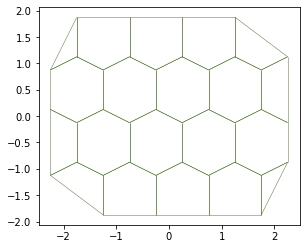

In [5]:
fig, ax = sheet_view(sheet_2d)

### Closed 2D geometry

We can also use the `generate_ring` function to create a 2D ring of 4-sided cells.

In [6]:
ring = generate_ring(Nf=24, R_in=12, R_out=14)
PlanarGeometry.update_all(ring)


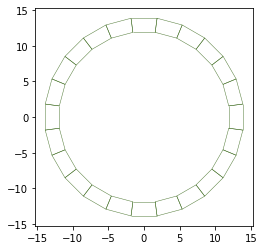

In [7]:
fig, ax = sheet_view(ring)


## Sheet geometry in 2.5D


The `SheetGeometry` class computes the geometry of a 2D surface mesh embeded in 3D. The positions of the vertices and edges are thus defined in 3D.

In [8]:
from tyssue import SheetGeometry


sheet_3d = Sheet.planar_sheet_3d('sheet', nx=6, ny=6, 
                                 distx=1, disty=1)
sheet_3d.sanitize(trim_borders=True)
SheetGeometry.update_all(sheet_3d)



In [9]:
sheet_3d.vert_df.head()

,y,is_active,x,z,rho,height,basal_shift
vert,,,,,,,
0,2.625,1,0.5,0,0,-4.0,4.0
1,3.375,1,1.5,0,0,-4.0,4.0
2,2.625,1,2.5,0,0,-4.0,4.0
3,3.375,1,0.5,0,0,-4.0,4.0
4,3.625,1,1.0,0,0,-4.0,4.0


In [10]:
sheet_3d.face_df.head()

,y,is_alive,perimeter,area,x,num_sides,id,z,height,rho,vol
face,,,,,,,,,,,
0,1.250000,1,3.118034,0.5000,1.125000,4,0,0,-4.0,0,-2.00
1,1.125000,1,3.618034,0.8750,2.000000,5,0,0,-4.0,0,-3.50
2,1.125000,1,3.618034,0.8750,3.000000,5,0,0,-4.0,0,-3.50
3,1.125000,1,3.618034,0.8750,4.000000,5,0,0,-4.0,0,-3.50
4,1.208333,1,2.427051,0.1875,4.666667,3,0,0,-4.0,0,-0.75


We can use the `height` columns to compute a pseudo-volume for each face, computed as the face area times it's height.

### Relative coordinates in `edge_df`

The edge dataframe stores a copy of the face and source and target vertices positions, and other relative values.

![](illus/double_edges.svg)

In [11]:
sheet_3d.edge_df.head()

,trgt,nz,length,face,srce,dx,dy,sx,sy,tx,...,is_active,ux,uy,uz,is_valid,rx,ry,rz,sub_area,sub_vol
edge,,,,,,,,,,,,,,,,,,,,,
0,0,0.3750,0.750000,10,3,0.0,-0.75,0.5,3.375,0.5,...,1,0.0,-0.75,0.0,True,-0.5,0.375,0,0.18750,-0.750
1,6,0.3750,0.750000,7,5,0.0,0.75,3.0,1.625,3.0,...,1,0.0,0.75,0.0,True,0.5,-0.375,0,0.18750,-0.750
2,5,0.3750,0.750000,8,6,0.0,-0.75,3.0,2.375,3.0,...,1,0.0,-0.75,0.0,True,-0.5,0.375,0,0.18750,-0.750
3,10,0.3125,0.559017,8,5,0.5,-0.25,3.0,1.625,3.5,...,1,0.5,-0.25,0.0,True,-0.5,-0.375,0,0.15625,-0.625
4,5,0.2500,0.559017,2,10,-0.5,0.25,3.5,1.375,3.0,...,1,-0.5,0.25,0.0,True,0.5,0.250,0,0.12500,-0.500


### Closed sheet in 2.5D


For closed surfaces, a `ClosedSheetGeometry` is available. Calling `update_all` computes the enclosed volume of the sheet, and stores it the `settings` attribute as `"lumen_vol"`





In [12]:
from tyssue.geometry.sheet_geometry import ClosedSheetGeometry
from tyssue.generation import ellipsoid_sheet

ellipso = ellipsoid_sheet(a=12, b=12, c=21, n_zs=12)
ClosedSheetGeometry.update_all(ellipso)

In [13]:
lumen_vol = ellipso.settings['lumen_vol']

print(f"Lumen volume: {lumen_vol: .0f}")

Lumen volume:  11440


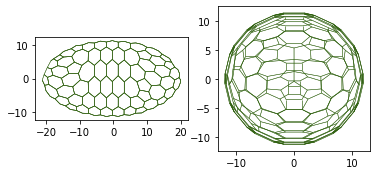

In [14]:
fig, (ax0, ax1) = plt.subplots(1, 2)

fig, ax0 = sheet_view(
    ellipso, 
    coords=["z", "y"],
    ax=ax0
)
fig, ax1 = sheet_view(
    ellipso, 
    coords=["x", "y"],
    ax=ax1
)

`sheet_view` can be called in 3D mode with ipyvolume:

In [15]:
import ipyvolume as ipv
ipv.clear()
fig, mesh = sheet_view(ellipso, mode="3D")
fig

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…

## Monolayer 

To represent monolayers, we add a `cell` element and dataframe to the datasets.

One easy way to create a monolayer is to extrude it from a sheet:

In [24]:
from tyssue import Monolayer, MonolayerGeometry, ClosedMonolayerGeometry
from tyssue.generation import extrude

extruded = extrude(sheet_3d.datasets, method='translation')
specs = config.geometry.bulk_spec()
monolayer = Monolayer('mono', extruded, specs)
MonolayerGeometry.update_all(monolayer)

ipv.clear()
fig, mesh = sheet_view(monolayer, mode="3D")
fig

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…

Faces and edges in a monolayer belong to a segment: apical, basal or lateral.

In [25]:
monolayer.face_df["segment"].unique()

array(['apical', 'basal', 'lateral'], dtype=object)

We can filter the data based on these segments:

In [26]:
apical_faces = monolayer.face_df[
    monolayer.face_df["segment"] == "apical"
]

It is possible to extract the basal or apical sheets from a monolayer with `monolayer.get_sub_sheet`:

In [27]:
basal = monolayer.get_sub_sheet("basal")

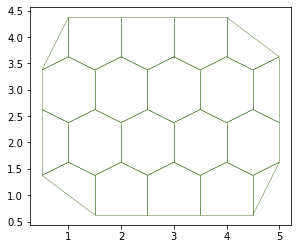

In [28]:
fig, ax = sheet_view(basal, coords=['x', 'y'])

### Closed Monolayer

Similarly to sheet, monolayers can be closed with a defined lumen.

In [29]:
datasets = extrude(ellipso.datasets, method='homotecy', scale=0.9)

mono_ellipso = Monolayer('mono_ell', datasets)
mono_ellipso.vert_df['z'] += 5

ClosedMonolayerGeometry.update_all(mono_ellipso)

ipv.clear()

fig, mesh = sheet_view(mono_ellipso, mode="3D")
fig


Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…

In [30]:
mono_ellipso.settings

{'lumen_vol': 8344.553887776496}

## Bulk tissue 


Eventually, we can define arbitrary assemblies of cells. 

A way 

In [31]:
from tyssue import Epithelium, BulkGeometry
from tyssue.generation import from_3d_voronoi, hexa_grid3d
from tyssue.draw import highlight_cells
from scipy.spatial import Voronoi

cells = hexa_grid3d(4, 4, 6)
datasets = from_3d_voronoi(Voronoi(cells))
specs = config.geometry.bulk_spec()
bulk = Epithelium('bulk', datasets, specs)
bulk.reset_topo()
bulk.reset_index()
bulk.sanitize()
bulk.reset_topo()
bulk.reset_index()


BulkGeometry.update_all(bulk)

bulk.face_df['visible'] = False

highlight_cells(bulk, [12, 4])
ipv.clear()
fig2, mesh = sheet_view(bulk, mode="3D",
                        face={"visible":True})
fig2

Figure(camera=PerspectiveCamera(fov=45.0, position=(0.0, 0.0, 2.0), projectionMatrix=(1.0, 0.0, 0.0, 0.0, 0.0,…